In [ ]:
import pretty_midi
import numpy as np

# Carica il file MIDI
midi_data = pretty_midi.PrettyMIDI('tuo_file.mid')

# Contenitori per le informazioni
notes = []
pitches = []
onsets = []

# Itera attraverso ogni strumento (traccia) nel file MIDI
for instrument in midi_data.instruments:
    # Itera attraverso ogni nota dello strumento
    for note in instrument.notes:
        notes.append(note.pitch)  # Aggiungi il pitch della nota
        pitches.append(note.velocity)  # Aggiungi la velocity della nota
        onsets.append(note.start)  # Aggiungi l'onset (tempo di inizio)

# Converte le liste in array numpy (tensori)
notes_tensor = np.array(notes)
pitches_tensor = np.array(pitches)
onsets_tensor = np.array(onsets)

# Stampa i tensori ottenuti
print("Notes Tensor:", notes_tensor)
print("Pitches Tensor:", pitches_tensor)
print("Onsets Tensor:", onsets_tensor)


/home/seraf/DLAI/Advanced_Pitch/.conda/lib/python3.11/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


98.99895833333333


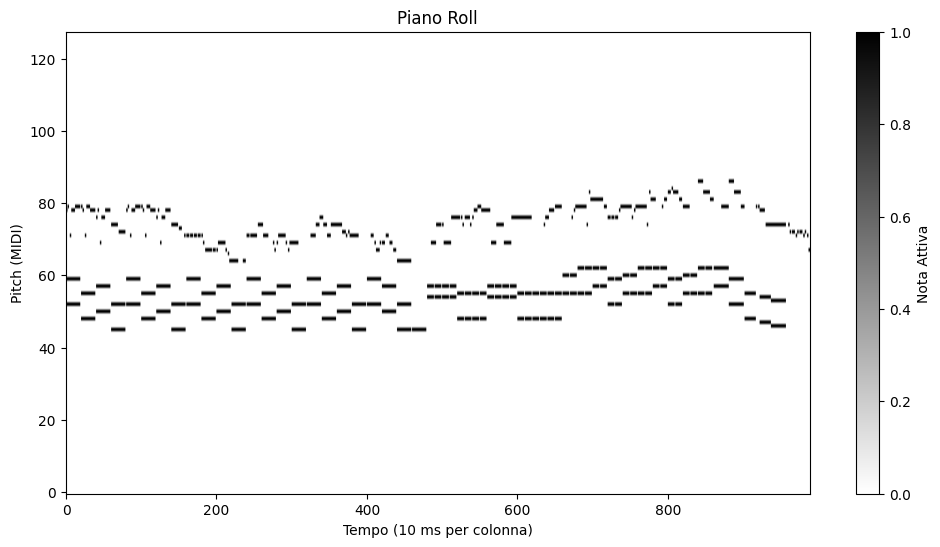

In [72]:
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np

# Carica il file MIDI
midi_data = pretty_midi.PrettyMIDI('/home/seraf/Downloads/HandWMIDI/Frozen.mid')

# Parametri della visualizzazione
n_notes = 128
n_time_steps = int(midi_data.get_end_time() * 10)  # 10 ms per step temporale
piano_roll = np.zeros((n_notes, n_time_steps))
print(midi_data.get_end_time())
# Ottieni gli strumenti e le note
for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = int(note.start * 10)
        end = int(note.end * 10)
        pitch = note.pitch
        piano_roll[pitch, start:end] = 1

# Plot della piano roll
plt.figure(figsize=(12, 6))
plt.imshow(piano_roll, aspect='auto', cmap='gray_r', origin='lower')
plt.xlabel('Tempo (10 ms per colonna)')
plt.ylabel('Pitch (MIDI)')
plt.title('Piano Roll')
plt.colorbar(label='Nota Attiva')
plt.show()

In [73]:
import pretty_midi
import sox
import soundfile as sf
from basic_pitch.constants import (
    AUDIO_N_CHANNELS,
    AUDIO_SAMPLE_RATE,
)

def analyze_audio(audio_path, new_audio_path):
    tfm = sox.Transformer()
    tfm = sox.Transformer()
    tfm.rate(AUDIO_SAMPLE_RATE)
    tfm.channels(AUDIO_N_CHANNELS)
    tfm.build(audio_path, new_audio_path)                
    data, samplerate = sf.read(new_audio_path)    
    sf.write(new_audio_path, data, samplerate, subtype='PCM_16')
    duration = len(data) / samplerate
    return duration


def crop_and_shift_midi(input_file, output_file, start_time, duration):
    # load MIDI file
    midi_data = pretty_midi.PrettyMIDI(input_file)
    # compute end time
    end_time = start_time + duration
    # new midi object to store the cropped and modified MIDI
    cropped_midi = pretty_midi.PrettyMIDI()
    
    for instrument in midi_data.instruments:
        # new instrument in the cropped MIDI
        new_instrument = pretty_midi.Instrument(program=instrument.program)
        
        for note in instrument.notes:
            if note.start >= start_time and note.end <= end_time and note.pitch > 63:
                # Shift temporale delle note
                new_start = note.start - start_time
                new_end = note.end - start_time
                # Crea una nuova nota con i tempi shiftati
                new_note = pretty_midi.Note(
                    pitch=note.pitch,
                    start=new_start,
                    end=new_end,
                    velocity=note.velocity
                )
                new_instrument.notes.append(new_note)
        
        # Aggiungi lo strumento al nuovo file MIDI
        cropped_midi.instruments.append(new_instrument)
    
    # Salva il nuovo file MIDI
    cropped_midi.write(output_file)


# Esempio di utilizzo
duration = analyze_audio('/home/seraf/Downloads/HandWMIDI/example.wav', '/home/seraf/Downloads/COPIEMIDI/example.wav')
crop_and_shift_midi('/home/seraf/Downloads/HandWMIDI/Frozen.mid', '/home/seraf/Downloads/COPIEMIDI/Frozen.mid', start_time=67, duration=duration)


/home/seraf/DLAI/Advanced_Pitch/.conda/lib/python3.11/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


18.625


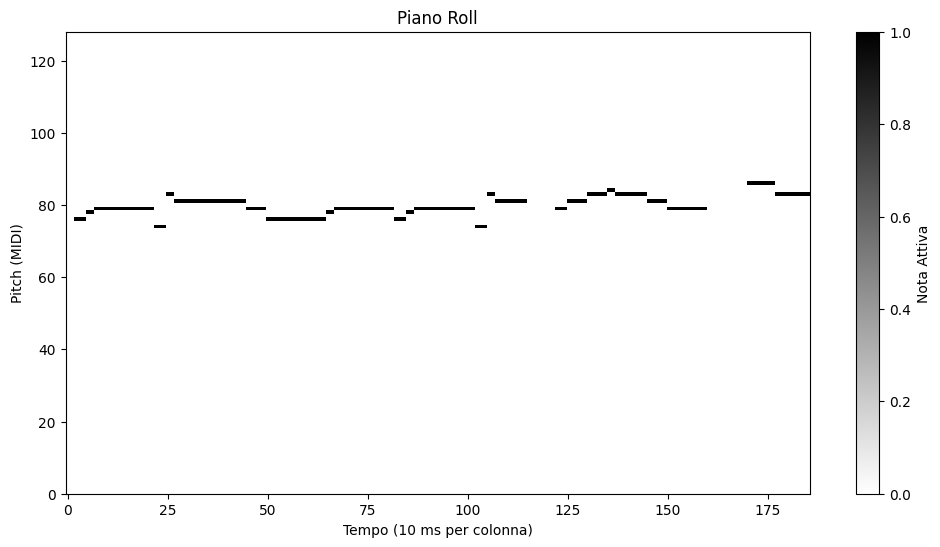

In [74]:
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np

# Carica il file MIDI
midi_data = pretty_midi.PrettyMIDI('/home/seraf/Downloads/COPIEMIDI/Frozen.mid')

# Parametri della visualizzazione
n_notes = 128
n_time_steps = int(midi_data.get_end_time() * 10)  # 10 ms per step temporale
piano_roll = np.zeros((n_notes, n_time_steps))
print(midi_data.get_end_time())
# Ottieni gli strumenti e le note
for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = int(note.start * 10)
        end = int(note.end * 10)
        pitch = note.pitch
        piano_roll[pitch, start:end] = 1

# Plot della piano roll
plt.figure(figsize=(12, 6))
plt.imshow(piano_roll, aspect='auto', cmap='gray_r', origin='lower')
plt.xlabel('Tempo (10 ms per colonna)')
plt.ylabel('Pitch (MIDI)')
plt.title('Piano Roll')
plt.colorbar(label='Nota Attiva')
plt.ylim (0,128)
plt.show()



In [77]:
from basic_pitch.constants import (
    ANNOTATION_HOP,
    FREQ_BINS_NOTES,
    FREQ_BINS_CONTOURS,
)
time_scale = np.arange(0, duration + ANNOTATION_HOP, ANNOTATION_HOP)
n_time_frames = len(time_scale)
print(n_time_frames)

onset_indx = round(onsets)

1607


In [51]:
import mirdata
import sox
import numpy as np 
from basic_pitch.constants import (
    ANNOTATION_HOP,
    FREQ_BINS_NOTES,
    FREQ_BINS_CONTOURS,
)


dagstuhl = mirdata.initialize('dagstuhl_choirset')
track_local = dagstuhl.track(dagstuhl.track_ids[30])

duration = sox.file_info.duration(track_local.audio_lrx_path)
time_scale = np.arange(0, duration + ANNOTATION_HOP, ANNOTATION_HOP)
n_time_frames = len(time_scale)

note_indices, note_values = track_local.score.to_sparse_index(time_scale, "s", FREQ_BINS_NOTES, "hz")
onset_indices, onset_values = track_local.score.to_sparse_index(time_scale, "s", FREQ_BINS_NOTES, "hz", onsets_only=True)
contour_indices, contour_values = track_local.f0_crepe_lrx.to_sparse_index(time_scale, "s", FREQ_BINS_CONTOURS, "hz")

In [98]:
midi_data = pretty_midi.PrettyMIDI('/home/seraf/Downloads/COPIEMIDI/Frozen.mid')
note_indx = np.empty((0, 2), dtype=int)
for instrument in midi_data.instruments:
    for note in instrument.notes:
        row = [note.start, note.pitch]
        note_indx = np.vstack((note_indx, row))


def create_onset(note_indx):
    onsets_new = note_indx
    onsets_new[:, 0] = np.round(note_indx[:, 0] / ANNOTATION_HOP)
    onsets_new = onsets_new.astype(int)
    return onsets_new
print(create_onset(note_indx))

[[  22   76]
 [  43   78]
 [  64   79]
 [ 194   74]
 [ 215   83]
 [ 236   81]
 [ 387   79]
 [ 430   76]
 [ 452   76]
 [ 473   76]
 [ 516   76]
 [ 559   78]
 [ 580   79]
 [ 710   76]
 [ 731   78]
 [ 752   79]
 [ 882   74]
 [ 903   83]
 [ 924   81]
 [1054   79]
 [1075   81]
 [1118   83]
 [1161   84]
 [1182   83]
 [1247   81]
 [1290   79]
 [1462   86]
 [1526   83]]


In [96]:
onsets_new = onsets_new.astype(int)
print(onsets_new)

[[  22   76]
 [  43   78]
 [  64   79]
 [ 194   74]
 [ 215   83]
 [ 236   81]
 [ 387   79]
 [ 430   76]
 [ 452   76]
 [ 473   76]
 [ 516   76]
 [ 559   78]
 [ 580   79]
 [ 710   76]
 [ 731   78]
 [ 752   79]
 [ 882   74]
 [ 903   83]
 [ 924   81]
 [1054   79]
 [1075   81]
 [1118   83]
 [1161   84]
 [1182   83]
 [1247   81]
 [1290   79]
 [1462   86]
 [1526   83]]
